In [4]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

C:\Users\TOMASZSTOPA\Anaconda3\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:181: UserWarning: Credentials are already in use. The existing account in the session will be replaced.
  warnings.warn('Credentials are already in use. The existing '


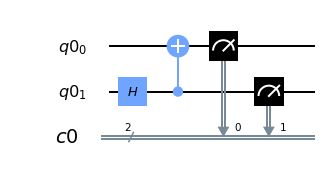

In [5]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)

circuit = QuantumCircuit(qr, cr)

circuit.h(qr[1])
circuit.cx(qr[1], qr[0])
circuit.measure(qr, cr)

circuit.draw(output='mpl')

## List available Aer simulators:

In [10]:
for backend in Aer.backends():
    print(backend.name())

qasm_simulator
statevector_simulator
unitary_simulator


## Statevector simulator

In [21]:
# Run the quantum circuit on a statevector simulator backend
backend_statevector = Aer.get_backend('statevector_simulator')
job = execute(circuit, backend_statevector)
result = job.result()
outputstate = result.get_statevector(circuit, decimals=3)
print(outputstate)

[1.+0.j 0.+0.j 0.+0.j 0.+0.j]


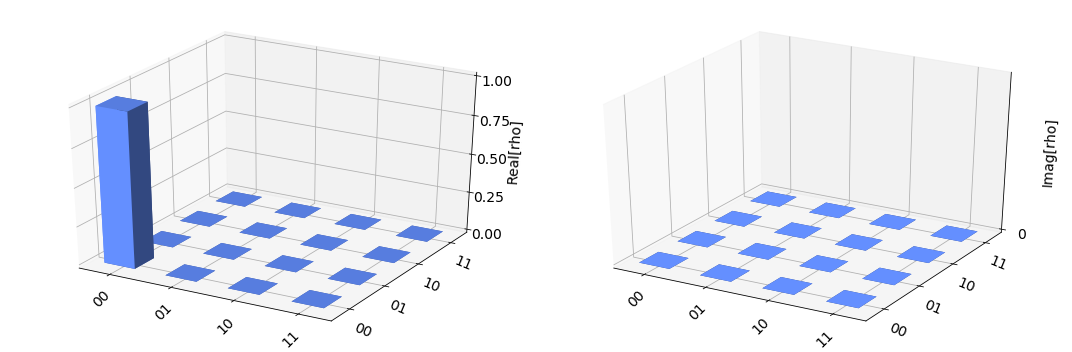

In [22]:
plot_state_city(outputstate)

Note, that the result is always either '00' or '11'. This is because we perform the measurement! Now run new simulation but without the measurement...

## Unitary simulator

In [28]:
backend_unitary = Aer.get_backend('unitary_simulator')
job_unitary = execute(circuit2, backend_unitary)
result_unitary = job_unitary.result()

# Show the results
print(result_unitary.get_unitary(circuit2, decimals=3))

[[ 0.707+0.j  0.   +0.j  0.707+0.j  0.   +0.j]
 [ 0.   +0.j  0.707+0.j  0.   +0.j  0.707+0.j]
 [ 0.   +0.j  0.707+0.j  0.   +0.j -0.707+0.j]
 [ 0.707+0.j  0.   +0.j -0.707+0.j  0.   +0.j]]


Now check what happens if you try to simulate the first circuit with measurement...

## OpenQASM simulator

In [30]:
backend_sim = Aer.get_backend('qasm_simulator')
job_sim = execute(circuit, backend_sim, shots=1024)
result_sim = job_sim.result()
counts = result_sim.get_counts(circuit)
print(counts)

{'00': 528, '11': 496}


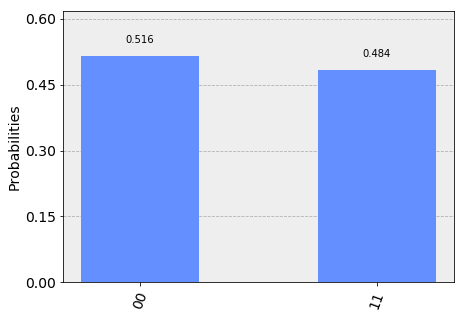

In [31]:
plot_histogram(counts)

## Simulating circuits using the IBM Q cloud simulator

In [33]:
provider = IBMQ.get_provider(group='open')
backend_simcloud = provider.get_backend('ibmq_qasm_simulator')
job_simcloud = execute(circuit, backend=backend_simcloud)

In [35]:
job_simcloud.status()

<JobStatus.DONE: 'job has successfully run'>

In [36]:
result_simcloud = job_simcloud.result()
counts = result_simcloud.get_counts(circuit)
print(counts)

{'00': 503, '11': 521}


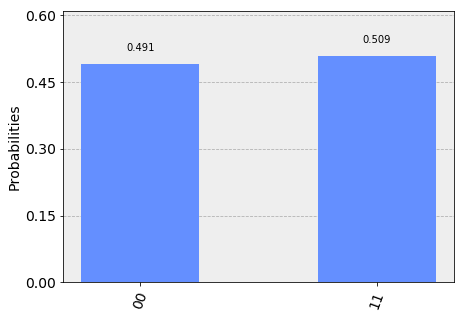

In [37]:
plot_histogram(counts)